In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download data

In [ ]:
!curl -O "https://raw.githubusercontent.com/SaminRK/scPSS-reproducibility/refs/heads/master/data_downloaders/download_hlca_tutorial.py"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   927  100   927    0     0   4610      0 --:--:-- --:--:-- --:--:--  4635


In [ ]:
from download_hlca_tutorial import download_hlca_tutorial
download_hlca_tutorial("data/")

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye
From (redirected): https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye&confirm=t&uuid=4e268786-8f66-4d8b-9018-dbc1612c24b1
To: /content/hlca_tutorial.h5ad
100%|██████████| 118M/118M [00:01<00:00, 89.4MB/s]


## Explore data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install git+https://github.com/SaminRK/scPSS.git

  Cloning https://github.com/SaminRK/scPSS.git to /tmp/pip-req-build-_8qzrpzs
  Running command git clone --filter=blob:none --quiet https://github.com/SaminRK/scPSS.git /tmp/pip-req-build-_8qzrpzs
  Resolved https://github.com/SaminRK/scPSS.git to commit c16c71713e6a618ed6196b83b1dc3daa30838e1a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.9 MB/s eta 0:00:00
  Created wheel for scPSS: f

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ad_total = sc.read('/content/data/hlca_tutorial.h5ad')

In [ ]:
ad_normal = ad_total[ad_total.obs['disease'] == 'normal']
ad_disease = ad_total[ad_total.obs['disease'] == 'pulmonary fibrosis']

In [ ]:
ad_normal

View of AnnData object with n_obs × n_vars = 210262 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
ad_disease

View of AnnData object with n_obs × n_vars = 239952 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
len(ad_normal.obs['donor_id'].unique()), len(ad_disease.obs['donor_id'].unique())

(59, 52)

In [ ]:
ad_total

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
celltypes = ad_total.obs['ann_level_3_label_final'].unique()
celltypes

['T cell lineage', 'Secretory', 'Macrophages', 'Multiciliated lineage', 'Monocytes', ..., 'Submucosal Secretory', 'Lymphatic EC differentiating', 'Rare', 'Smooth muscle FAM83D+', 'Lymphatic EC proliferating']
Length: 25
Categories (25, object): ['AT1', 'AT2', 'B cell lineage', 'Basal', ..., 'Secretory',
                          'Smooth muscle FAM83D+', 'Submucosal Secretory', 'T cell lineage']

In [ ]:
ad_total.obs["ann_level_3_label_final"].value_counts()

,count
ann_level_3_label_final,
Macrophages,158750
T cell lineage,38367
Multiciliated lineage,30795
Fibroblasts,29405
Basal,26767
Monocytes,25551
AT2,25154
Secretory,21948
EC capillary,21734


In [ ]:
celltype = 'Macrophages'

In [ ]:
ad = ad_total[ad_total.obs['ann_level_3_label_final'] == celltype]

In [ ]:
ad

View of AnnData object with n_obs × n_vars = 158750 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

## Explore each cell type separately

In [ ]:
SAMPLE_SIZE = 50_000
if len(ad) > SAMPLE_SIZE: sc.pp.subsample(ad, n_obs=SAMPLE_SIZE)

In [ ]:
ad

AnnData object with n_obs × n_vars = 50000 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
sc.tl.pca(ad)

<Axes: title={'center': 'disease'}, xlabel='PC1', ylabel='PC2'>

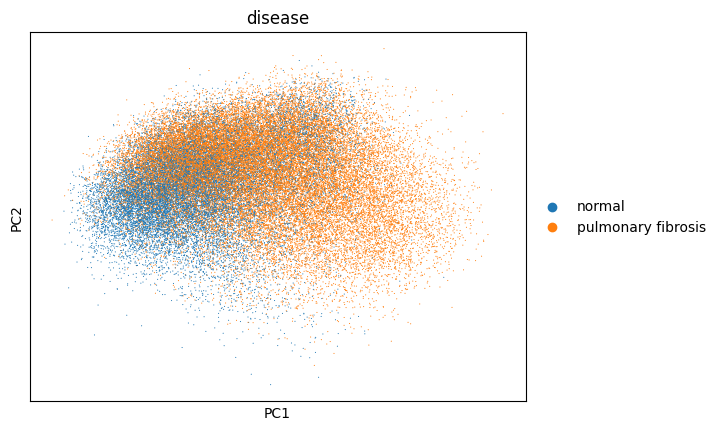

In [ ]:
sc.pl.pca(ad, color=['disease'], show=False)

## Problem scenario: Only healthy reference available

In [ ]:
ad_normal = ad[ad.obs['disease'] == 'normal']
ad_disease = ad[ad.obs['disease'] == 'pulmonary fibrosis']

In [ ]:
ad_normal

View of AnnData object with n_obs × n_vars = 17335 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    uns: 'pca', 'disease_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'

In [ ]:
ad_disease

View of AnnData object with n_obs × n_vars = 32665 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    uns: 'pca', 'disease_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'

In [ ]:
ref_samples = ad_normal.obs['sample'].unique()
que_samples = ad_disease.obs['sample'].unique()

In [ ]:
import random
import scanpy as sc
from scpss import scPSS

In [ ]:
scpss = scPSS(ad, 'sample', ref_samples, que_samples)
scpss.harmony_integrate()
scpss.find_optimal_parameters()
scpss.set_distance_and_condition()

✅ PCA Complete.


2025-07-24 02:53:01,488 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2025-07-24 02:53:06,587 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2025-07-24 02:53:06,864 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2025-07-24 02:53:34,807 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2025-07-24 02:54:02,327 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2025-07-24 02:54:28,046 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2025-07-24 02:54:46,299 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2025-07-24 02:55:06,146 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2025-07-24 02:55:23,043 - harmonypy - INFO - Iteration 7 of 10
INFO:harmonypy:Iteration 7 of 10
2025-07-24 02:55:40,201 - 

✅ Harmony Integration Complete.
✅ Found Optimal Parameters.
✅ Stored distances and conditions in Anndata object.


In [ ]:
all_distances = scpss.adata.obs['scpss_scores']
thres = scpss.best_params['threshold']
dist_ref_ref = all_distances[scpss.reference_mask]
dist_que_ref = all_distances[scpss.query_mask]

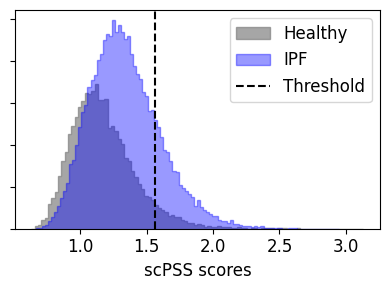

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.hist(dist_ref_ref, bins=100, color='grey', label='Healthy', histtype='step', lw=2, fill=True, alpha=.7)
ax.hist(dist_que_ref, bins=100, color='blue', label='IPF', histtype='step', lw=2, fill=True, alpha=.4)

ax.axvline(thres, color='black', linestyle='--', label='Threshold')
ax.legend(fontsize=12)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_yticklabels([])
ax.set_xlabel('scPSS scores', fontsize=12)

plt.tight_layout()
plt.show()
plt.close()


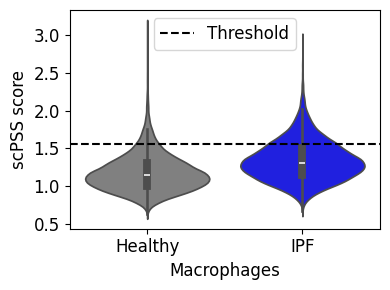

In [ ]:
import seaborn as sns
import pandas as pd

# Prepare data for violin plot
df = pd.DataFrame({
    "scPSS score": list(dist_ref_ref) + list(dist_que_ref),
    "Group": ["Healthy"] * len(dist_ref_ref) + ["IPF"] * len(dist_que_ref)
})

fig, ax = plt.subplots(figsize=(4, 3))

sns.violinplot(data=df, x="Group", y="scPSS score", palette={"Healthy": "grey", "IPF": "blue"}, ax=ax)

# Optional: add threshold as horizontal line
ax.axhline(thres, color='black', linestyle='--', label='Threshold')
ax.legend(fontsize=12)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylabel('scPSS score', fontsize=12)
ax.set_xlabel(celltype, fontsize=12)

plt.tight_layout()
plt.show()
plt.close()


In [ ]:
np.mean(scpss.adata.obs['scpss_outlier'] == 'Outlier'), np.mean(scpss.adata.obs['scpss_outlier_uncorrected'] == 'Outlier')

(np.float64(0.14562), np.float64(0.14562))

In [ ]:
OUTPUT_PATH = "/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/reproducibility/scpss_data"

In [ ]:
import os
output_dir = f"{OUTPUT_PATH}/scpss-ipf-shifts"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
summary_csv_path = os.path.join(output_dir, "summary.csv")

In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from scpss import scPSS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

with open(summary_csv_path, "w") as f:
    print("celltype,num_cells,threshold,outlier_ratio_ref_uncorrected,outlier_ratio_que_uncorrected,outlier_ratio_ref,outlier_ratio_que", file=f, flush=True)

    # Main loop
    for celltype in ad_total.obs['ann_level_3_label_final'].unique():
        ad = ad_total[ad_total.obs['ann_level_3_label_final'] == celltype]
        num_cells = ad.shape[0]

        if num_cells < 1000:
            continue

        if num_cells > 20_000:
            sc.pp.subsample(ad, n_obs=20_000, random_state=100)

        num_cells = ad.shape[0]

        print(f"Processing: {celltype} ({num_cells} cells)")

        ad_normal = ad[ad.obs['disease'] == 'normal']
        ad_disease = ad[ad.obs['disease'] == 'pulmonary fibrosis']

        ref_samples = ad_normal.obs['sample'].unique()
        que_samples = ad_disease.obs['sample'].unique()

        # scPSS pipeline
        scpss = scPSS(ad, 'sample', ref_samples, que_samples)
        scpss.harmony_integrate()
        scpss.find_optimal_parameters()
        scpss.set_distance_and_condition()

        # Distances and threshold
        all_distances = scpss.adata.obs['scpss_scores']
        thres = scpss.best_params['threshold']
        dist_ref_ref = all_distances[scpss.reference_mask]
        dist_que_ref = all_distances[scpss.query_mask]

        ad_ref = scpss.adata[scpss.reference_mask]
        ad_que = scpss.adata[scpss.query_mask]

        outlier_ratio_ref_st = np.mean(ad_ref.obs['scpss_outlier'] == 'Outlier')
        outlier_ratio_que_st = np.mean(ad_que.obs['scpss_outlier'] == 'Outlier')

        outlier_ratio_ref_un = np.mean(ad_ref.obs['scpss_outlier_uncorrected'] == 'Outlier')
        outlier_ratio_que_un = np.mean(ad_que.obs['scpss_outlier_uncorrected'] == 'Outlier')


        # Append metrics to summary CSV
        with open(summary_csv_path, "a") as f:
            print(f"{celltype},{num_cells},{thres:.4f},{outlier_ratio_ref_un},{outlier_ratio_que_un},{outlier_ratio_ref_st},{outlier_ratio_que_st}", flush=True, file=f)

        # --- Violin plot ---
        violin_df = pd.DataFrame({
            "Score": list(dist_ref_ref) + list(dist_que_ref),
            "Group": ["Healthy"] * len(dist_ref_ref) + ["IPF"] * len(dist_que_ref)
        })
        violin_df.to_csv(f"{output_dir}/{celltype}_scores.csv", index=False)


        fig, ax = plt.subplots(figsize=(4, 3))
        sns.violinplot(data=violin_df, x="Group", y="Score",
                      palette={"Healthy": "grey", "IPF": "blue"}, ax=ax)
        ax.axhline(thres, color='black', linestyle='--', label='Threshold')
        ax.legend(fontsize=10)
        ax.set_xlabel(celltype, fontsize=12)
        ax.set_ylabel('scPSS Scores', fontsize=12)
        plt.tight_layout()
        violin_path = os.path.join(output_dir, f"{celltype}_violin.png")
        plt.savefig(violin_path, dpi=300)
        plt.close()

        # --- PCA plot ---
        sc.pl.pca(
            scpss.adata,
            color=['disease'],  # or 'group', 'condition', etc.
            # show=False,
            # save=f"/{celltype}_pca.png"  # saved in `figures/` by default
        )

Output hidden; open in https://colab.research.google.com to view.

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv(summary_csv_path)
df

,celltype,num_cells,threshold,outlier_ratio_ref_uncorrected,outlier_ratio_que_uncorrected,outlier_ratio_ref,outlier_ratio_que
0,T cell lineage,20000,0.2383,0.056850,0.104746,0.056850,0.104746
1,Secretory,20000,1.0696,0.070900,0.207540,0.042203,0.131878
2,Macrophages,20000,1.1984,0.057577,0.215240,0.057577,0.215240
3,Multiciliated lineage,20000,0.3323,0.064210,0.097733,0.064210,0.097733
4,Monocytes,20000,2.3437,0.104304,0.134231,0.007193,0.008491
5,Lymphatic EC mature,3799,1.2950,0.110032,0.144687,0.004045,0.007536
6,B cell lineage,9782,2.3772,0.058714,0.059717,0.052656,0.050812
7,AT2,20000,1.2820,0.058536,0.185595,0.058536,0.185595
8,Innate lymphoid cell NK,14009,0.7571,0.106799,0.126307,0.055469,0.057825
9,EC arterial,3923,1.7779,0.109172,0.221951,0.004456,0.009756


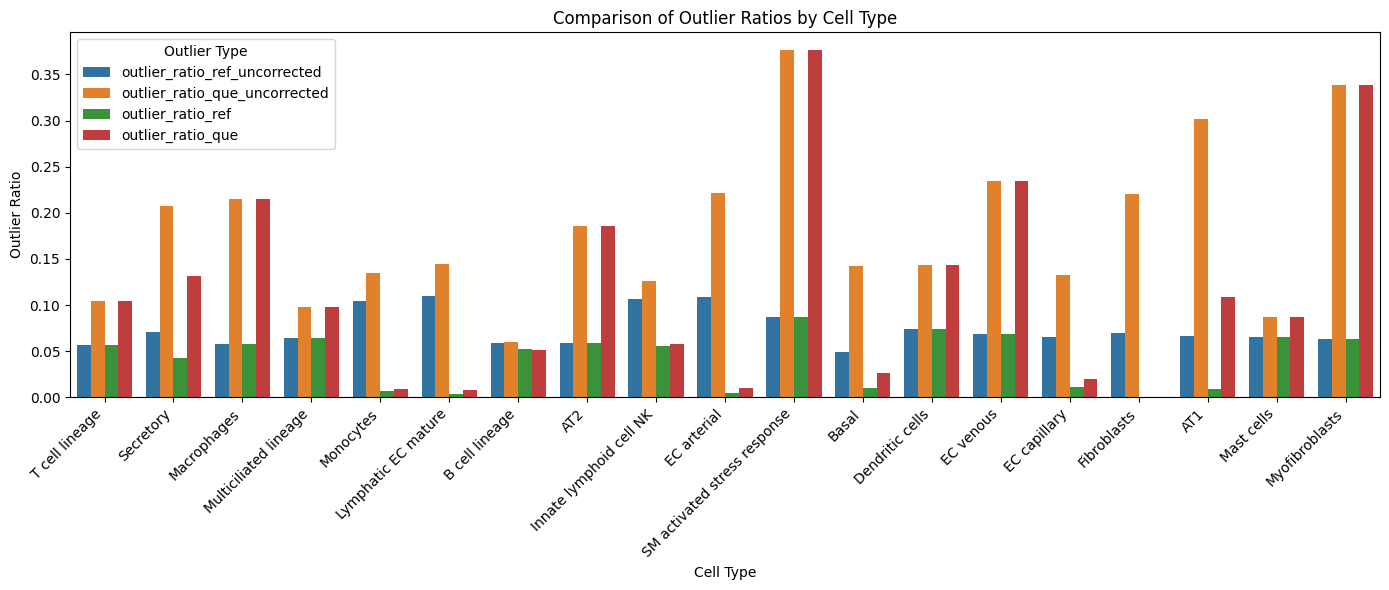

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# your dataframe (df) — assuming it's already loaded
# drop rows with missing values
df = df.dropna()

# melt the dataframe to long format for seaborn
df_melted = df.melt(id_vars='celltype',
                    value_vars=['outlier_ratio_ref_uncorrected', 'outlier_ratio_que_uncorrected',
                                'outlier_ratio_ref', 'outlier_ratio_que'],
                    var_name='outlier_type',
                    value_name='outlier_ratio')

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the grouped barplot
sns.barplot(data=df_melted, x='celltype', y='outlier_ratio', hue='outlier_type')

# Aesthetics
plt.xticks(rotation=45, ha='right')
plt.xlabel("Cell Type")
plt.ylabel("Outlier Ratio")
plt.title("Comparison of Outlier Ratios by Cell Type")
plt.legend(title="Outlier Type")
plt.tight_layout()

plt.show()


In [44]:
import numpy as np

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std if pooled_std != 0 else np.nan

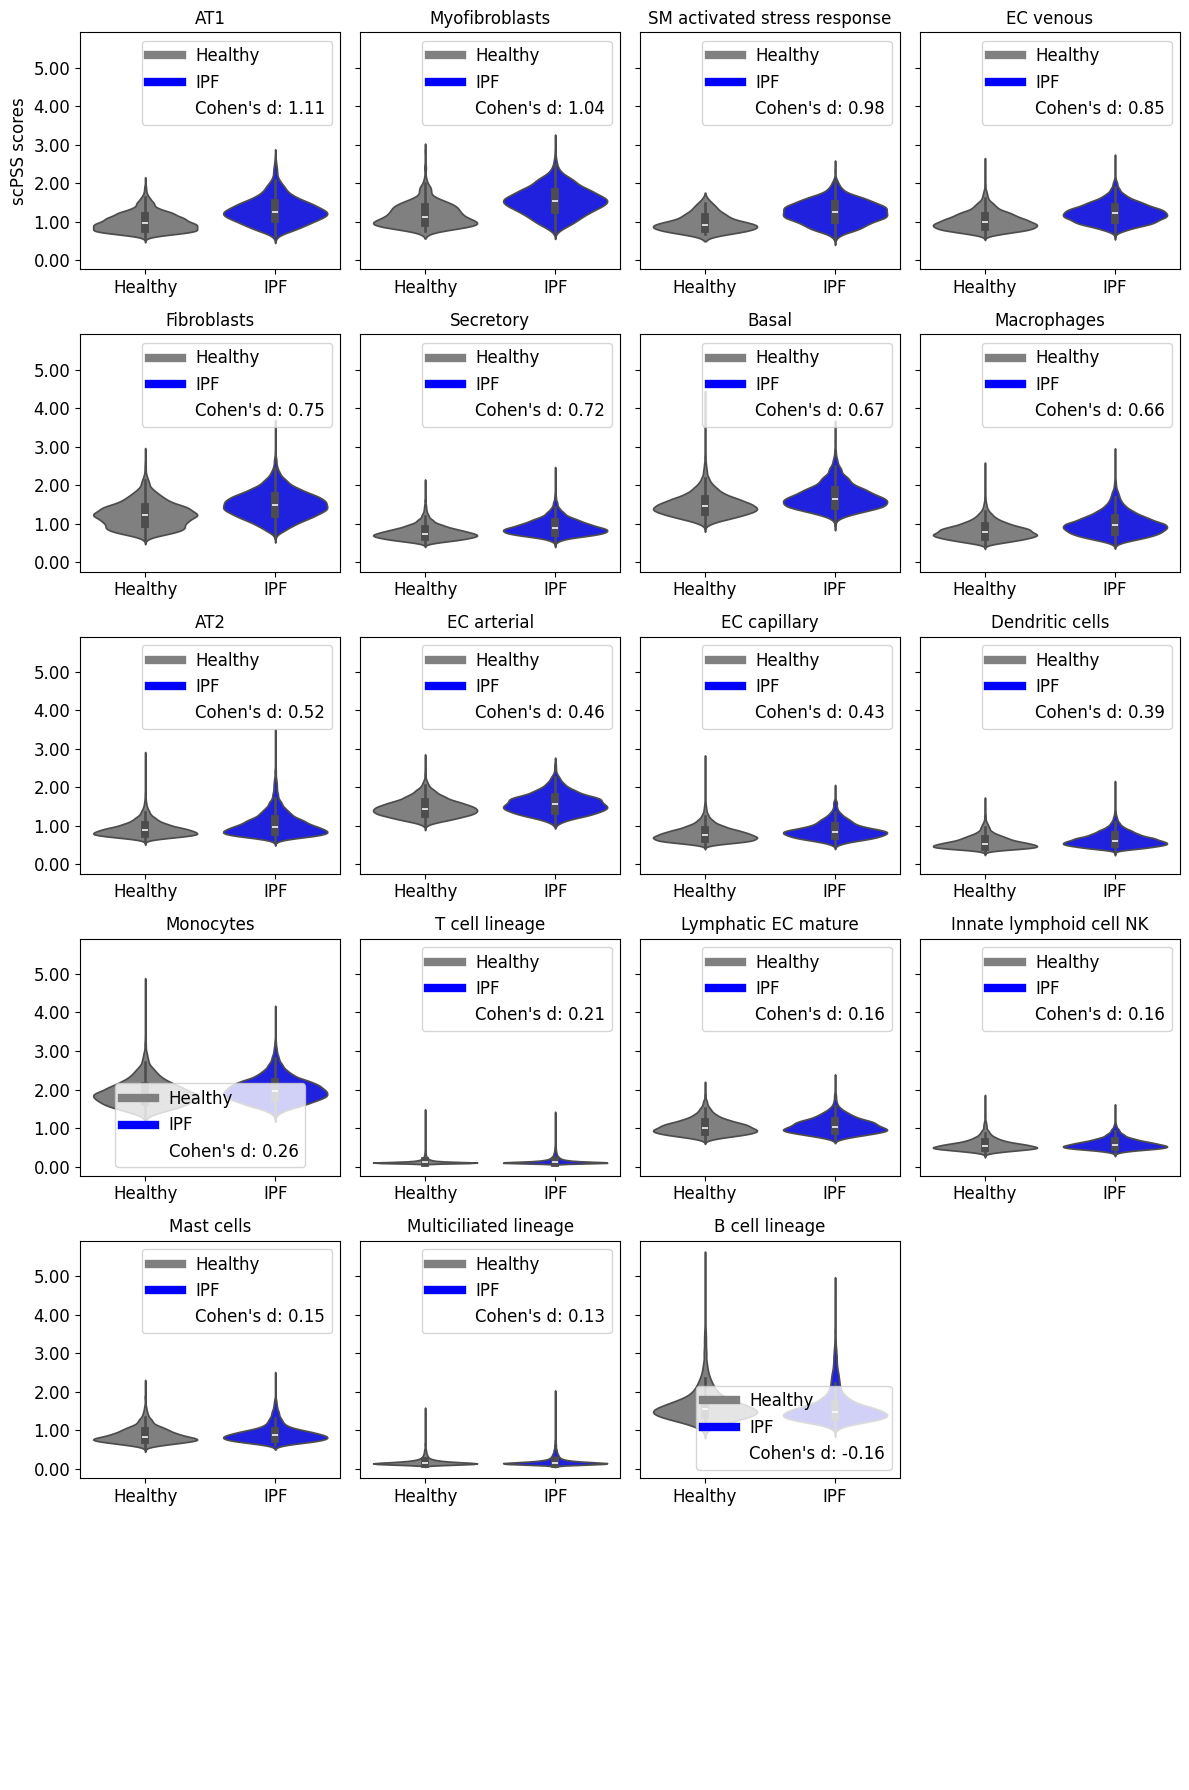

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import os
import numpy as np

# Cohen's d function
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std if pooled_std != 0 else np.nan

# Load all CSVs
files = glob.glob("/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/reproducibility/scpss_data/scpss-ipf-shifts/*.csv")
all_dfs = []
cohen_list = []

for file in files:
    basename = os.path.basename(file)
    celltype = basename.split("_")[0]
    df = pd.read_csv(file)

    if {'Score', 'Group'}.issubset(df.columns) and df['Group'].nunique() >= 2:
        df['celltype'] = celltype
        all_dfs.append(df)

        g1 = df[df['Group'] == 'Healthy']['Score']
        g2 = df[df['Group'] == 'IPF']['Score']
        if len(g1) > 1 and len(g2) > 1:
            d = cohens_d(g2, g1)  # IPF vs Ref
            cohen_list.append((celltype, d))

# Combine all data
df_all = pd.concat(all_dfs, ignore_index=True)

# Sort by Cohen's d descending
df_cohen = pd.DataFrame(cohen_list, columns=["celltype", "cohen_d"]).sort_values("cohen_d", ascending=False)
ordered_celltypes = df_cohen["celltype"].tolist()

# Reorder categories for plotting
df_all['celltype'] = pd.Categorical(df_all['celltype'], categories=ordered_celltypes, ordered=True)

# Plotting parameters
n = len(ordered_celltypes)
nrows = 6
ncols = (n + nrows - 1) // nrows  # ceiling division for cols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 3, nrows * 3), sharey=True)
axes = axes.flatten()

# Palette fixed
palette = {"Healthy": "grey", "IPF": "blue"}

from matplotlib.lines import Line2D

for i, celltype in enumerate(ordered_celltypes):
    ax = axes[i]
    subset = df_all[df_all['celltype'] == celltype]

    sns.violinplot(
        data=subset,
        x="Group",
        y="Score",
        palette=palette,
        ax=ax
    )

    # Cohen's d value
    d_val = df_cohen.loc[df_cohen['celltype'] == celltype, 'cohen_d'].values[0]

    # Manually create legend handles for groups with correct colors
    group_handles = [
        Line2D([0], [0], color=palette["Healthy"], lw=6),
        Line2D([0], [0], color=palette["IPF"], lw=6)
    ]
    group_labels = ["Healthy", "IPF"]

    # Add Cohen's d legend entry with empty handle (no color)
    cohen_handle = Line2D([0], [0], color='none')
    handles = group_handles + [cohen_handle]
    labels = group_labels + [f"Cohen's d: {d_val:.2f}"]

    ax.legend(handles, labels, fontsize=12)

    ax.set_title(celltype, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('' if i != 0 else 'scPSS scores', fontsize=12)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"{y:.2f}"))

# Turn off unused axes if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
